# Instituto Federal de Minas Gerais - Campus Ouro Preto


## Pós Graduação em Inteligência Artificial

Disciplina - Apredizagem de Máquina

Prof. Frederico Guimarães Gadellha

Alunos: Arthur Cardoso Figueiredo e Pâmela Murta Castro Lima

Título: 

In [1]:

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
data = pd.read_csv('C:\ObesityDataSet_raw_and_data_sinthetic.csv')


NameError: name 'pd' is not defined

In [3]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Análise Exploratória

In [4]:
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Descrição das colunas no conjunto de dados:

Gênero: O gênero do indivíduo (por exemplo, Feminino ou Masculino).
Idade: A idade do indivíduo em anos.
Altura: A altura do indivíduo em metros.
Peso: O peso do indivíduo em quilogramas.
Histórico familiar de sobrepeso: Indica se o indivíduo tem histórico familiar de sobrepeso (sim ou não).
FAVC: Indica se o indivíduo consome vegetais com frequência (sim ou não).
FCVC: Frequência de consumo de vegetais.
NCP: Número de refeições principais em um dia.
CAEC: Frequência de consumo de comida calórica.
SMOKE: Indica se o indivíduo é fumante (sim ou não).
CH2O: Consumo de água diário.
SCC: Indica se o indivíduo monitora a ingestão de calorias (sim ou não).
FAF: Frequência de atividade física.
TUE: Tempo gasto em atividades sedentárias (como assistir TV, usar o computador, etc.).
CALC: Uso de métodos contraceptivos.
MTRANS: Modo de transporte utilizado pelo indivíduo.
NObeyesdad: Classificação do peso do indivíduo em diferentes categorias (por exemplo, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, etc.).

In [5]:
print(data.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

Essas informações fornecem um panorama geral das características das pessoas no conjunto de dados em relação a idade, altura, peso e alguns hábitos relacionados à alimentação e atividade física.

In [6]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

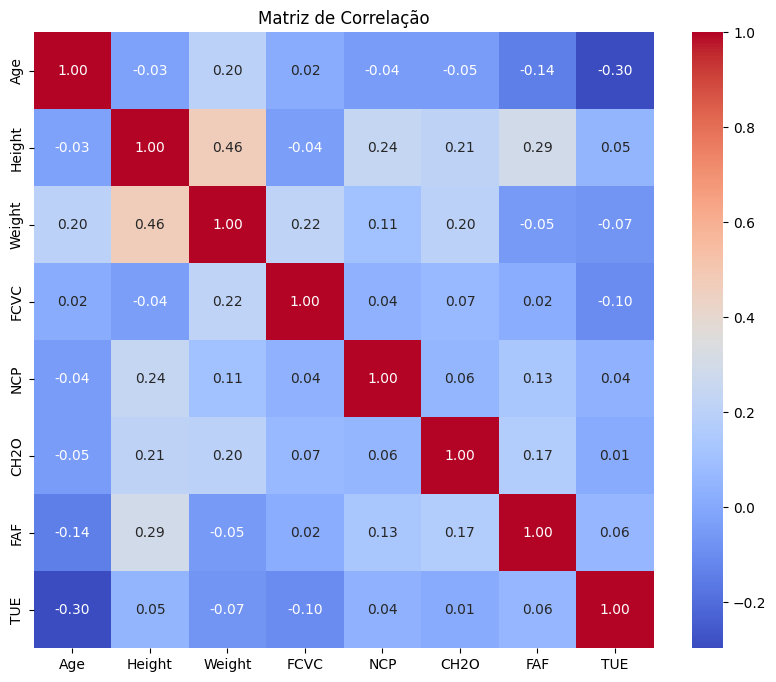

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include='float64').columns

# Correlações entre as variáveis numéricas
correlation_matrix = data[numeric_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



A análise da matriz de correlação:

Age e Height:

A correlação entre a idade (Age) e a altura (Height) é próxima de zero (-0.025958).
Isso indica que não há uma relação linear significativa entre a idade e a altura dos indivíduos.
Age e Weight:

Existe uma correlação positiva leve entre a idade (Age) e o peso (Weight) dos indivíduos (0.202560).
Isso sugere que, em geral, à medida que a idade aumenta, o peso tende a aumentar também, mas a relação não é muito forte.
Age e FCVC (Fruit & Vegetable Consumption):

A correlação entre a idade (Age) e o consumo de frutas e vegetais (FCVC) é próxima de zero (0.016291).
Isso indica que não há uma relação linear forte entre a idade e o consumo de frutas e vegetais.
Age e NCP (Number of Main Meals):

A correlação entre a idade (Age) e o número de refeições principais (NCP) é negativa e próxima de zero (-0.043944).
Isso sugere que a idade tem uma leve relação inversa com o número de refeições principais, mas a correlação é fraca.
Age e CH2O (Water Consumption):

A correlação entre a idade (Age) e o consumo de água (CH2O) é negativa e próxima de zero (-0.045304).
Isso indica que não há uma relação linear forte entre a idade e o consumo de água.
Age e FAF (Physical Activity Frequency):

A correlação entre a idade (Age) e a frequência de atividade física (FAF) é negativa e moderada (-0.144938).
Isso sugere que, em geral, à medida que a idade aumenta, a frequência de atividade física tende a diminuir, mas a relação não é muito forte.
Age e TUE (Time of Use of Technology Devices):

Existe uma correlação negativa moderada entre a idade (Age) e o tempo de uso de dispositivos tecnológicos (TUE) dos indivíduos (-0.296931).
Isso indica que, em geral, à medida que a idade aumenta, o tempo de uso de dispositivos tecnológicos tende a diminuir, mas a relação não é muito forte.

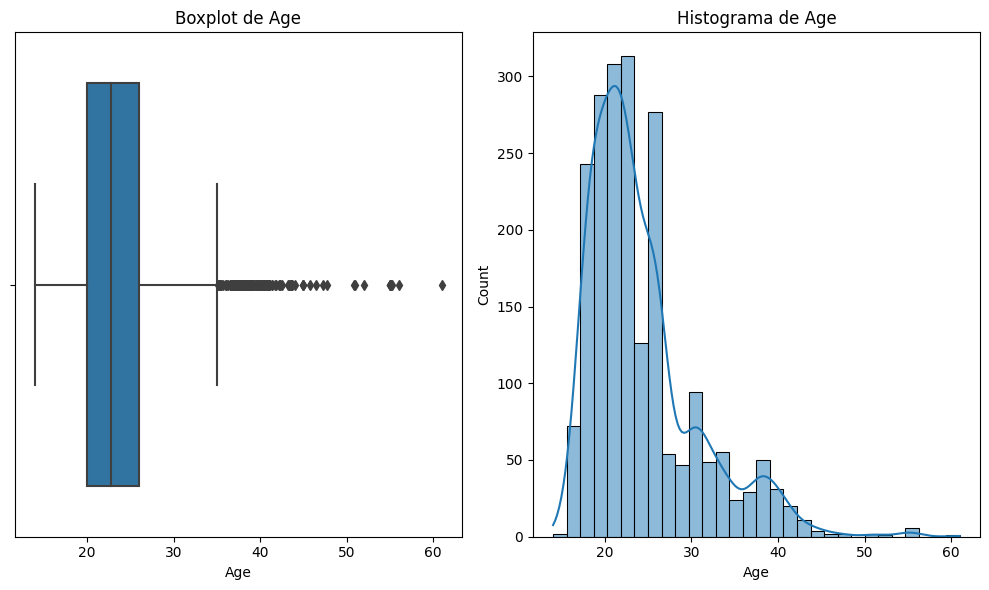


Dados do gráfico de Age:
Outliers: [41.0, 52.0, 39.0, 55.0, 38.0, 61.0, 44.0, 36.0, 38.0, 40.0, 55.0, 45.0, 38.0, 39.0, 41.0, 41.0, 40.0, 51.0, 56.0, 39.0, 38.0, 38.0, 38.0, 41.0, 40.0, 37.0, 40.0, 37.0, 41.0, 36.0, 37.0, 38.0, 36.0, 45.0, 41.823567, 35.125401, 36.769646, 35.194089, 37.218161, 42.24475, 37.455752, 40.0, 38.943282, 35.483601, 40.0, 38.939448, 39.965474, 38.692265, 38.952866, 36.631456, 39.214514, 38.825189, 35.217173, 55.24625, 42.189023, 38.464538, 37.496175, 50.832559, 36.310292, 43.238402, 45.0, 55.137881, 38.378056, 39.170029, 46.491859, 38.384177, 37.205173, 37.492444, 35.456326, 39.392569, 37.275298, 55.022494, 41.743333, 38.097395, 37.642177, 47.7061, 35.719457, 35.432059, 39.585811, 45.821267, 39.759575, 43.604901, 42.31607, 37.356288, 40.821515, 37.955371, 40.317787, 35.389491, 40.951591, 39.135634, 37.832949, 37.631769, 37.524551, 43.510672, 36.726617, 38.297259, 42.337283, 47.283374, 38.148845, 37.96543, 43.591999, 40.993179, 37.597953, 37.532066, 36.023972,

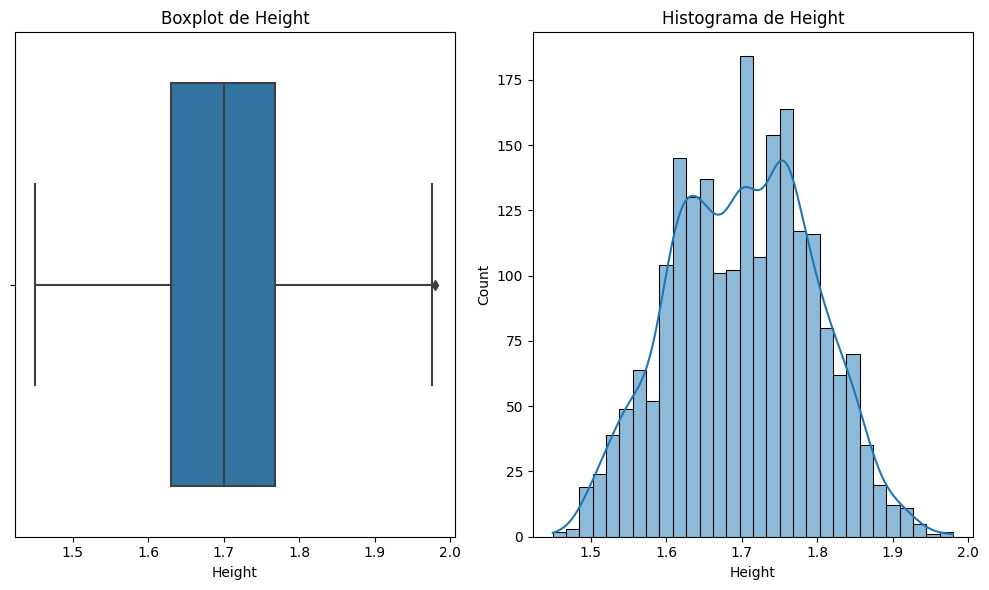


Dados do gráfico de Height:
Outliers: [1.98]
Intervalo IQR: [1.42, 1.98]



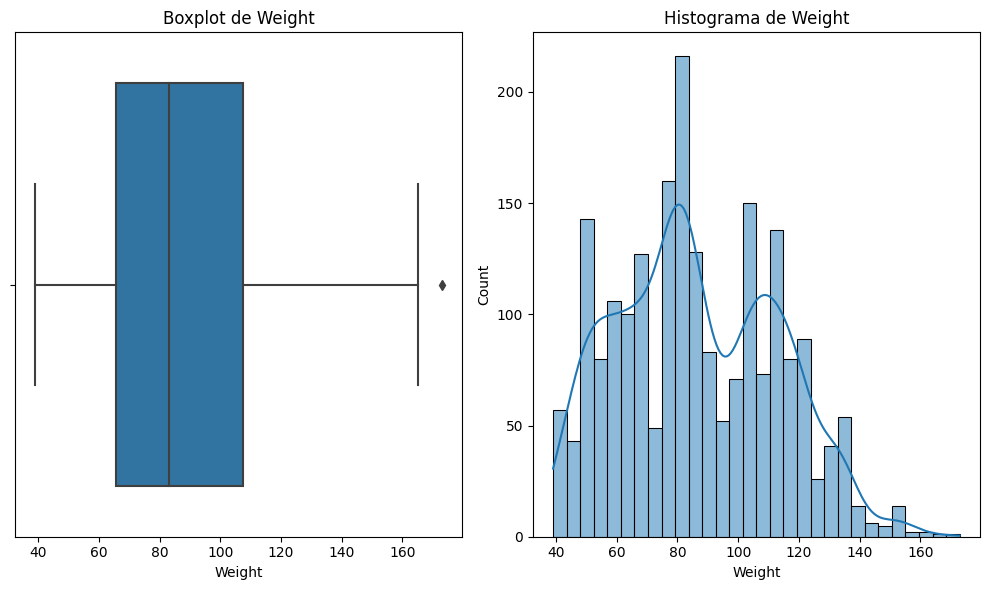


Dados do gráfico de Weight:
Outliers: [173.0]
Intervalo IQR: [2.54, 170.37]



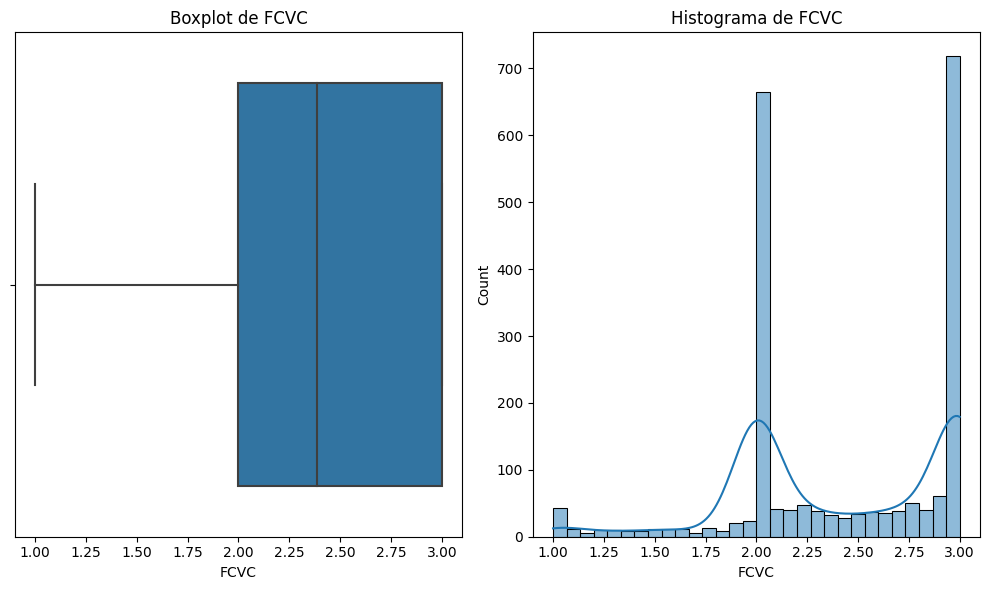


Dados do gráfico de FCVC:
Outliers: []
Intervalo IQR: [0.50, 4.50]



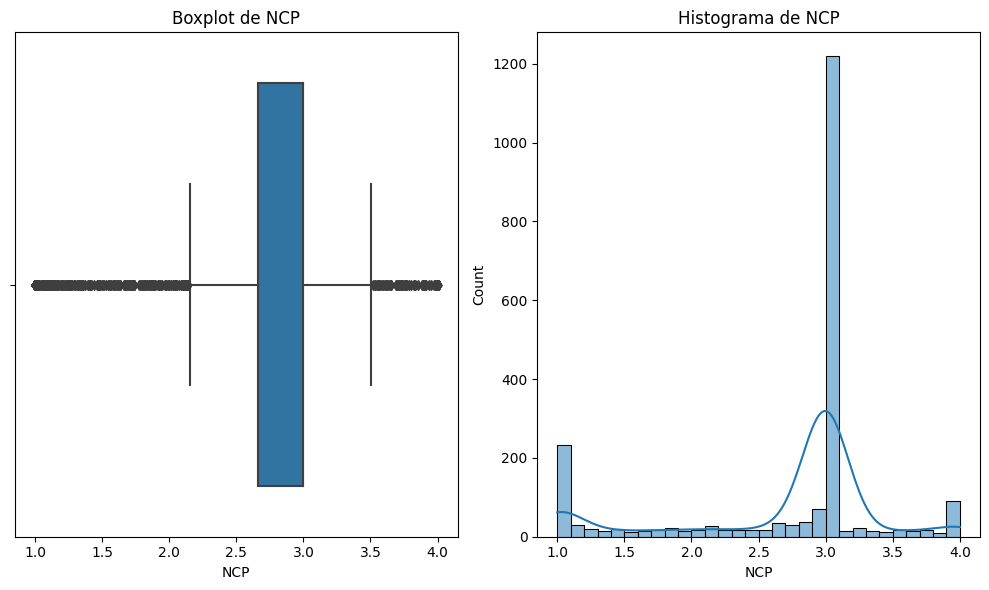


Dados do gráfico de NCP:
Outliers: [1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.995147, 1.72626, 1.600812, 1.73762, 1.10548, 2.0846, 1.894384, 1.0, 1.0, 1.0, 1.0, 1.0, 3.765526, 4.0, 3.691226, 1.07976, 1.0, 1.0, 3.559841, 3.891994, 3.904858, 3.590039, 2.057935, 3.55

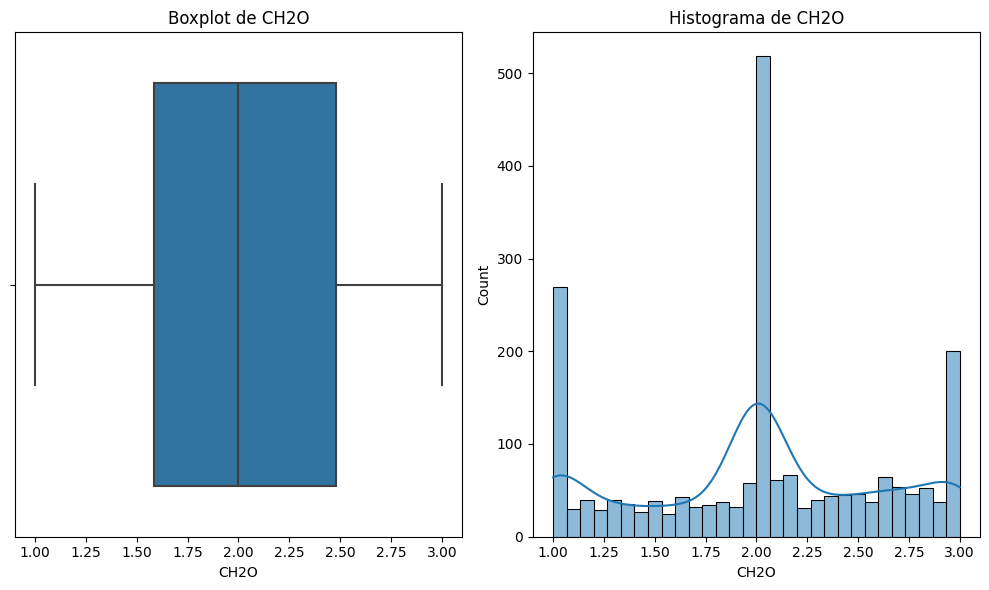


Dados do gráfico de CH2O:
Outliers: []
Intervalo IQR: [0.25, 3.82]



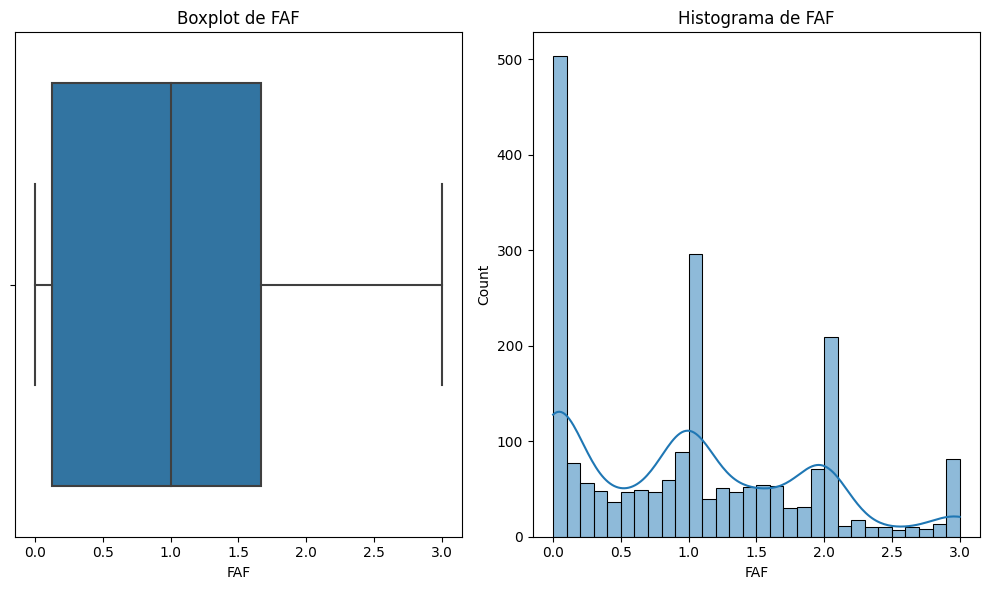


Dados do gráfico de FAF:
Outliers: []
Intervalo IQR: [-2.19, 3.98]



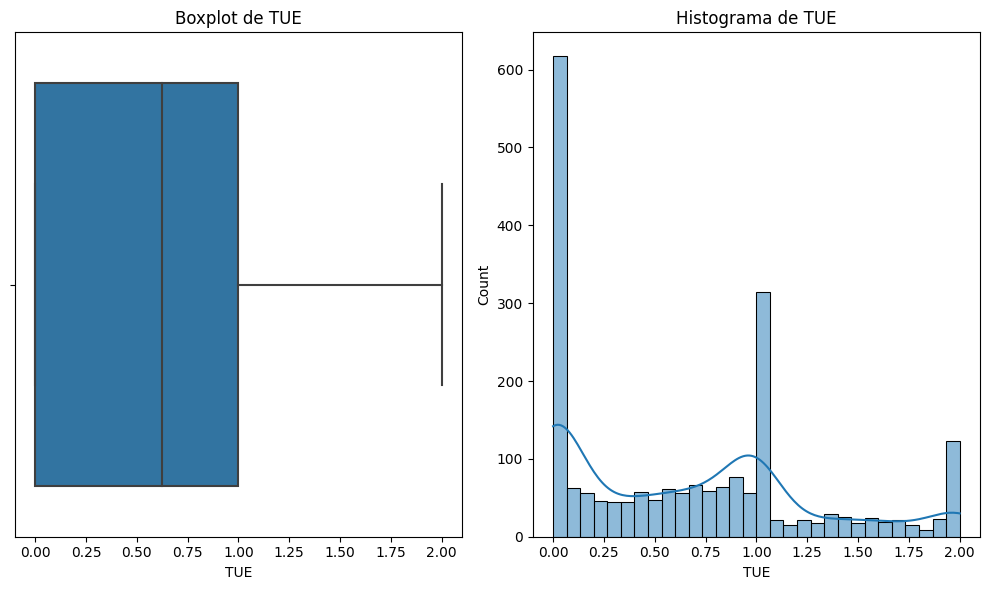


Dados do gráfico de TUE:
Outliers: []
Intervalo IQR: [-1.50, 2.50]



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos de Boxplot e Histogramas
numeric_columns = data.select_dtypes(include='float64').columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    
    # Histograma
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Identificar e imprimir os outliers
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    print(f"\nDados do gráfico de {column}:")
    print(f"Outliers: {outliers.tolist()}")
    print(f"Intervalo IQR: [{lower_bound:.2f}, {upper_bound:.2f}]\n")




Analisando os dados os dados do gáficos e intervalos IQR fornecidos:

Age:

O gráfico de Age mostra a distribuição da idade dos indivíduos.
Existem diversos outliers, identificados por valores que estão muito distantes dos demais (como 61.0 e 55.24625).
O intervalo IQR (Intervalo Interquartil) é de [10.87, 35.08], indicando que a maioria dos valores está entre esses limites.
Height:

O gráfico de Height mostra a distribuição da altura dos indivíduos.
Há um único outlier identificado pelo valor 1.98, que está distante dos outros valores.
O intervalo IQR é de [1.42, 1.98], o que indica que a maioria dos valores está dentro dessa faixa.
Weight:

O gráfico de Weight mostra a distribuição do peso dos indivíduos.
Há um único outlier identificado pelo valor 173.0, que está distante dos outros valores.
O intervalo IQR é de [2.54, 170.37], indicando que a maioria dos valores está dentro dessa faixa.
FCVC (Fruit & Vegetable Consumption):

O gráfico de FCVC mostra a distribuição do consumo de frutas e vegetais dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [0.50, 4.50], indicando que a maioria dos valores está dentro dessa faixa.
NCP (Number of Main Meals):

O gráfico de NCP mostra a distribuição do número de refeições principais dos indivíduos.
Existem diversos outliers, identificados por valores que estão distantes dos demais (como 4.0 e 1.72626).
O intervalo IQR é de [1.0, 4.0], o que indica que a maioria dos valores está entre 1.0 e 4.0.
CH2O (Water Consumption):

O gráfico de CH2O mostra a distribuição do consumo de água dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [0.25, 3.82], indicando que a maioria dos valores está dentro dessa faixa.
FAF (Physical Activity Frequency):

O gráfico de FAF mostra a distribuição da frequência de atividade física dos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [-2.19, 3.98], indicando que a maioria dos valores está dentro dessa faixa.
TUE (Time of Use of Technology Devices):

O gráfico de TUE mostra a distribuição do tempo de uso de dispositivos tecnológicos pelos indivíduos.
Não há outliers identificados, pois não há valores que se desviem significativamente dos outros.
O intervalo IQR é de [-1.50, 2.50], o que indica que a maioria dos valores está dentro dessa faixa.

In [10]:


# Carregar o DataFrame "data" aqui (substitua esta linha pelo código de carregamento)
# data = pd.read_csv('seu_arquivo.csv')  # Por exemplo, se for um arquivo CSV

# Converter variáveis categóricas em variáveis numéricas usando one-hot encoding
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data = pd.get_dummies(data, columns=categorical_columns)

# Separar os dados de entrada (features) e o target (classe de obesidade)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Converter os dados do DataFrame em uma matriz NumPy
X = X.values
y = y.values

# Converter os dados para o tipo float64
X = X.astype(np.float64)

# Converter os rótulos de classe (classe de obesidade) para valores numéricos usando o LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento adicional - Normalização dos dados usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os modelos que serão avaliados
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()

# Lista dos modelos que serão avaliados
models = [nb_model, knn_model, dt_model]
model_names = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']

# Definir as métricas que serão usadas para avaliar os modelos
scoring = {
    'Acurácia': 'accuracy',
    'Precisão': 'precision_weighted',
    'Recall': 'recall_weighted',
    'F1 Score': 'f1_weighted'
}

# Avaliar os modelos usando cross-validation
for model, nome in zip(models, model_names):
    print(f"Resultados para o modelo {nome}:")
    resultados = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    print("Acurácia:", np.mean(resultados['test_Acurácia']))
    print("Precisão:", np.mean(resultados['test_Precisão']))
    print("Recall:", np.mean(resultados['test_Recall']))
    print("F1 Score:", np.mean(resultados['test_F1 Score']))
    print()


Resultados para o modelo Naive Bayes:
Acurácia: 0.5100468807613294
Precisão: 0.5457585799659126
Recall: 0.5100468807613294
F1 Score: 0.4487433432648489

Resultados para o modelo K-Nearest Neighbors:
Acurácia: 0.8044966902533668
Precisão: 0.8056368507408124
Recall: 0.8044966902533668
F1 Score: 0.8013601633850879

Resultados para o modelo Decision Tree:
Acurácia: 0.9265394272470282
Precisão: 0.9283742059267475
Recall: 0.9265394272470282
F1 Score: 0.925978558699198



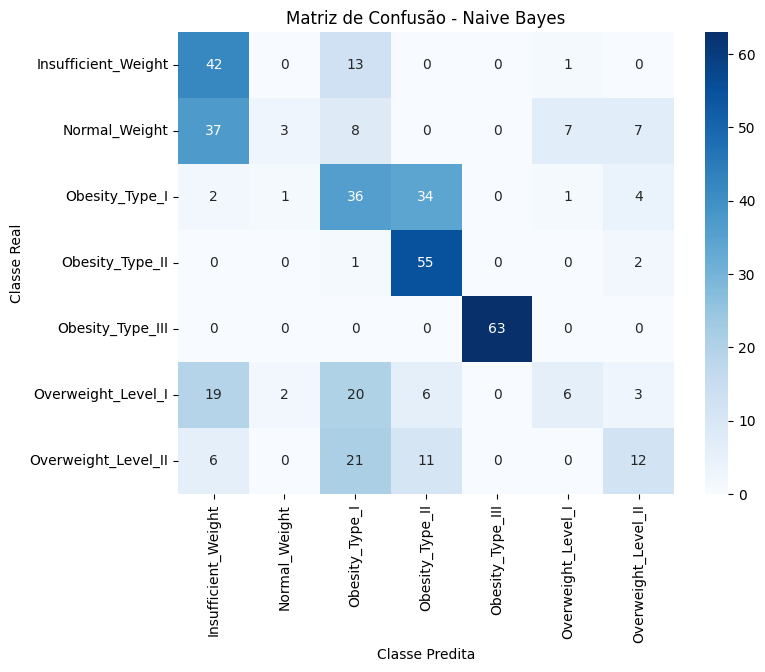

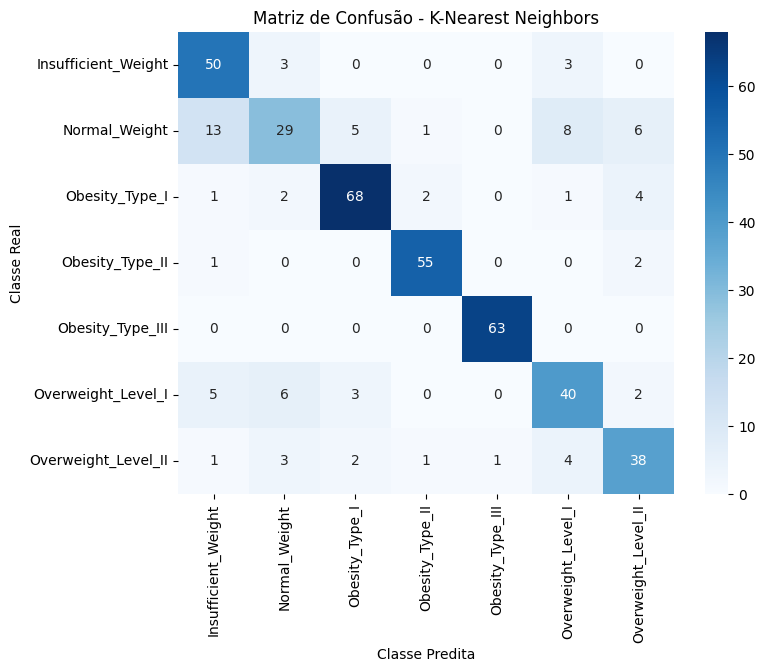

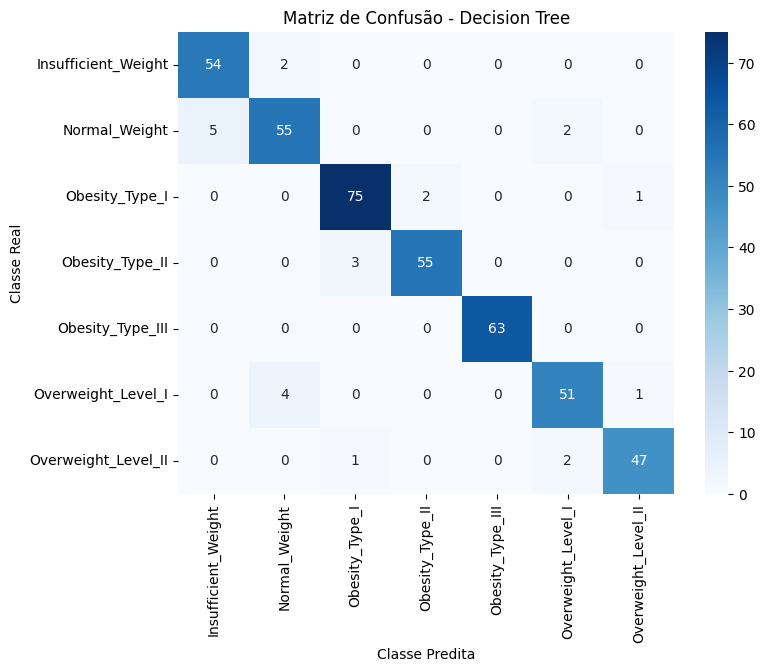

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o DataFrame "data" aqui (substitua esta linha pelo código de carregamento)
# data = pd.read_csv('seu_arquivo.csv')  # Por exemplo, se for um arquivo CSV



# Definir os modelos que serão avaliados
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()

# Lista dos modelos que serão avaliados
models = [nb_model, knn_model, dt_model]
model_names = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']

# Treinar os modelos
for model in models:
    model.fit(X_train, y_train)

# Função para plotar a matriz de confusão como um heatmap
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.title(title)
    plt.show()

# Nomes das classes de obesidade
class_names = label_encoder.classes_

# Fazer as previsões nos dados de teste
y_pred_nb = nb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calcular a matriz de confusão para cada modelo
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotar as matrizes de confusão para cada modelo
plot_confusion_matrix(cm_nb, class_names, 'Matriz de Confusão - Naive Bayes')
plot_confusion_matrix(cm_knn, class_names, 'Matriz de Confusão - K-Nearest Neighbors')
plot_confusion_matrix(cm_dt, class_names, 'Matriz de Confusão - Decision Tree')



In [12]:
# Imprimir os dados da matriz de confusão para cada modelo
print("Matriz de Confusão - Naive Bayes:")
print(cm_nb)

print("\nMatriz de Confusão - K-Nearest Neighbors:")
print(cm_knn)

print("\nMatriz de Confusão - Decision Tree:")
print(cm_dt)


Matriz de Confusão - Naive Bayes:
[[42  0 13  0  0  1  0]
 [37  3  8  0  0  7  7]
 [ 2  1 36 34  0  1  4]
 [ 0  0  1 55  0  0  2]
 [ 0  0  0  0 63  0  0]
 [19  2 20  6  0  6  3]
 [ 6  0 21 11  0  0 12]]

Matriz de Confusão - K-Nearest Neighbors:
[[50  3  0  0  0  3  0]
 [13 29  5  1  0  8  6]
 [ 1  2 68  2  0  1  4]
 [ 1  0  0 55  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 5  6  3  0  0 40  2]
 [ 1  3  2  1  1  4 38]]

Matriz de Confusão - Decision Tree:
[[54  2  0  0  0  0  0]
 [ 5 55  0  0  0  2  0]
 [ 0  0 75  2  0  0  1]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 51  1]
 [ 0  0  1  0  0  2 47]]


Naive Bayes:
O modelo Naive Bayes teve um desempenho razoável em algumas classes, mas enfrentou dificuldades em distinguir outras classes. Ele apresentou um bom número de acertos para as classes 0 e 4, mas cometeu erros significativos nas classes 2 e 3. A classe 5 também foi difícil para o modelo, com uma quantidade moderada de erros.

K-Nearest Neighbors:
O modelo K-Nearest Neighbors apresentou um desempenho consistente na maioria das classes, com uma quantidade razoável de acertos e poucos erros. No entanto, ele teve mais dificuldades em distinguir as classes 1 e 6, onde cometeu mais erros.

Decision Tree:
O modelo Decision Tree obteve o melhor desempenho geral entre os três modelos, apresentando a maior quantidade de acertos na matriz de confusão. Ele teve um desempenho excelente na maioria das classes, com poucos erros. Apenas nas classes 1 e 5, o modelo cometeu alguns erros, mas ainda assim, obteve um resultado muito satisfatório.

Conclusão:
Com base na análise das matrizes de confusão, o modelo Decision Tree se destacou como o mais eficaz para a tarefa de classificação de obesidade nesse conjunto de dados. Ele demonstrou a melhor capacidade de distinguir corretamente as classes e teve o maior número de acertos em geral. No entanto, é importante considerar outros fatores, como a interpretabilidade do modelo e os requisitos computacionais, ao tomar uma decisão final. Recomenda-se realizar testes adicionais com outros conjuntos de dados e métricas para obter uma avaliação mais abrangente do desempenho dos modelos.